# Exploratory Data Analysis

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
data = pd.read_csv("data_clean.csv", index_col=0)

In [3]:
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S


In [4]:
data.tail(10)

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
149,30.0,193.0,6.9,70,9,26,2010,70,C
150,NaN,145.0,13.2,77,9,27,2010,77,PS
151,14.0,191.0,14.3,75,9,28,2010,75,S
152,18.0,131.0,8.0,76,9,29,2010,76,PS
153,20.0,223.0,11.5,68,9,30,2010,68,S
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S
158,18.0,131.0,8.0,76,9,29,2010,76,C


In [5]:
#Data Structure 
type(data)
data.shape

(158, 9)

In [6]:
#data types
data.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

# Data type conversion

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


In [8]:
data['Month']=pd.to_numeric(data['Month'],errors='coerce')
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')# coerce will introduce NA values for non numeric data in the columns
data['Weather']=data['Weather'].astype('category')           #data['Wind']=data['Wind'].astype('int64')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 11.4 KB


####More on data type conversions
[link text](https://stackoverflow.com/questions/15891038/change-column-type-in-pandas)

# Duplicates

In [63]:
#Count of duplicated rows
data[data.duplicated()].shape

(1, 9)

In [11]:
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
2,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
4,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
5,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
155,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
156,NaN,145.0,13.2,77.0,9.0,27,2010,77,S
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [12]:
#Print the duplicated rows
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [13]:
data_cleaned1=data.drop_duplicates()

In [14]:
data_cleaned1.shape

(157, 9)

# Drop columns

In [15]:
data_cleaned2=data_cleaned1.drop('Temp C',axis=1)

In [16]:
data_cleaned2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


# Rename the columns

In [17]:
#rename the Solar column
data_cleaned3 = data_cleaned2.rename({'Solar.R': 'Solar'}, axis=1)

In [18]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


# Outlier Detection

<AxesSubplot:>

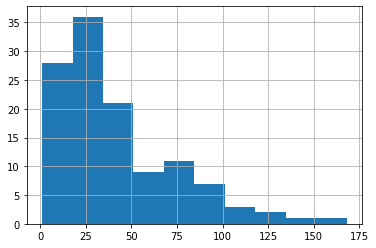

In [19]:
# histogram of Ozone
data_cleaned3['Ozone'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff1ba2bf190>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff1ba2bf850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff1ba2addf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1ba2bff10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff1ba2c92b0>],
 'means': []}

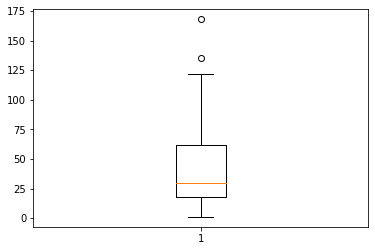

In [20]:
#Box plot
data_box=data_cleaned3.dropna()
data1_box=data_box.Ozone
plt.boxplot(data1_box)

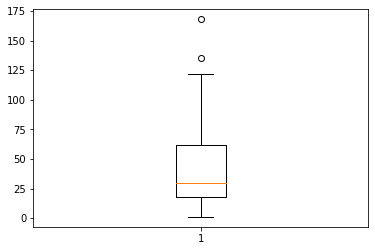

In [21]:
#Extracting outliers
box=plt.boxplot(data1_box)

In [22]:
box

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff1ba324940>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff1ba250040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff1ba324640>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff1ba250700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff1ba250a60>],
 'means': []}

In [23]:
type(box['fliers'])

list

In [24]:
for elem in box['fliers']:
    print(elem)
    print(elem.get_ydata())


Line2D(_line6)
[135. 168.]


In [25]:
for elem in box['whiskers']:
    print(elem)
    print(elem.get_ydata())

Line2D(_line1)
[18.  1.]
Line2D(_line2)
[ 62. 122.]


In [26]:
[item.get_ydata() for item in box['fliers']] #fliers are outliers

[array([135., 168.])]

In [27]:
#To get the whiskers
[item.get_ydata()[1] for item in box['whiskers']]

[1.0, 122.0]

In [28]:
#Descriptive stat
data_cleaned3['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

In [29]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


<AxesSubplot:>

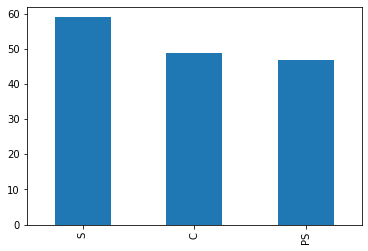

In [30]:
#Bar plot
data['Weather'].value_counts().plot.bar()

# Missing Values and Imputation

<AxesSubplot:>

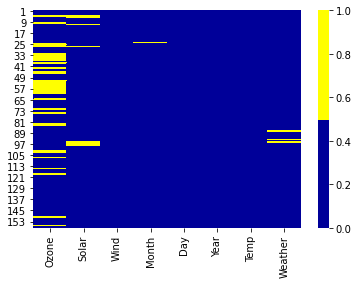

In [31]:
import seaborn as sns
cols = data_cleaned3.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_cleaned3[cols].isnull(),
            cmap=sns.color_palette(colours))

In [32]:
data_cleaned3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [33]:
#Mean Imputation
mean = data_cleaned3['Ozone'].mean()
print(mean)

41.81512605042017


In [34]:
data_cleaned3['Ozone'] = data_cleaned3['Ozone'].fillna(mean)

In [35]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.000000,190.0,7.4,5.0,1,2010,67,S
2,36.000000,118.0,8.0,5.0,2,2010,72,C
3,12.000000,149.0,12.6,5.0,3,2010,74,PS
4,18.000000,313.0,11.5,5.0,4,2010,62,S
5,41.815126,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.000000,223.0,11.5,9.0,30,2010,68,S
154,41.000000,190.0,7.4,5.0,1,2010,67,C
155,30.000000,193.0,6.9,9.0,26,2010,70,PS
156,41.815126,145.0,13.2,9.0,27,2010,77,S


In [36]:
#Missing value imputation for categorical vlaue
#Get the object columns
obj_columns=data_cleaned3[['Weather']]

In [37]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [65]:
obj_columns.mode().iloc[0]

Weather    S
Name: 0, dtype: category
Categories (3, object): ['C', 'PS', 'S']

In [39]:
#Missing value imputation for categorical vlaue
obj_columns=obj_columns.fillna(   obj_columns.mode().iloc[0]    )

In [40]:
obj_columns.isnull().sum()

Weather    0
dtype: int64

In [41]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.000000,190.0,7.4,5.0,1,2010,67,S
2,36.000000,118.0,8.0,5.0,2,2010,72,C
3,12.000000,149.0,12.6,5.0,3,2010,74,PS
4,18.000000,313.0,11.5,5.0,4,2010,62,S
5,41.815126,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.000000,223.0,11.5,9.0,30,2010,68,S
154,41.000000,190.0,7.4,5.0,1,2010,67,C
155,30.000000,193.0,6.9,9.0,26,2010,70,PS
156,41.815126,145.0,13.2,9.0,27,2010,77,S


In [42]:
obj_columns.shape

(157, 1)

In [43]:
#data_cleaned4=data_cleaned3.drop(['Weather'],axis=1,inplace=True)

In [44]:
#Join the data set with imputed object dataset
data_cleaned4=pd.concat([data_cleaned3,obj_columns],axis=1)

In [45]:
data_cleaned4.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
Weather    0
dtype: int64

In [46]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Weather
1,41.000000,190.0,7.4,5.0,1,2010,67,S,S
2,36.000000,118.0,8.0,5.0,2,2010,72,C,C
3,12.000000,149.0,12.6,5.0,3,2010,74,PS,PS
4,18.000000,313.0,11.5,5.0,4,2010,62,S,S
5,41.815126,NaN,14.3,5.0,5,2010,56,S,S
...,...,...,...,...,...,...,...,...,...
153,20.000000,223.0,11.5,9.0,30,2010,68,S,S
154,41.000000,190.0,7.4,5.0,1,2010,67,C,C
155,30.000000,193.0,6.9,9.0,26,2010,70,PS,PS
156,41.815126,145.0,13.2,9.0,27,2010,77,S,S


# Scatter plot and Correlation analysis

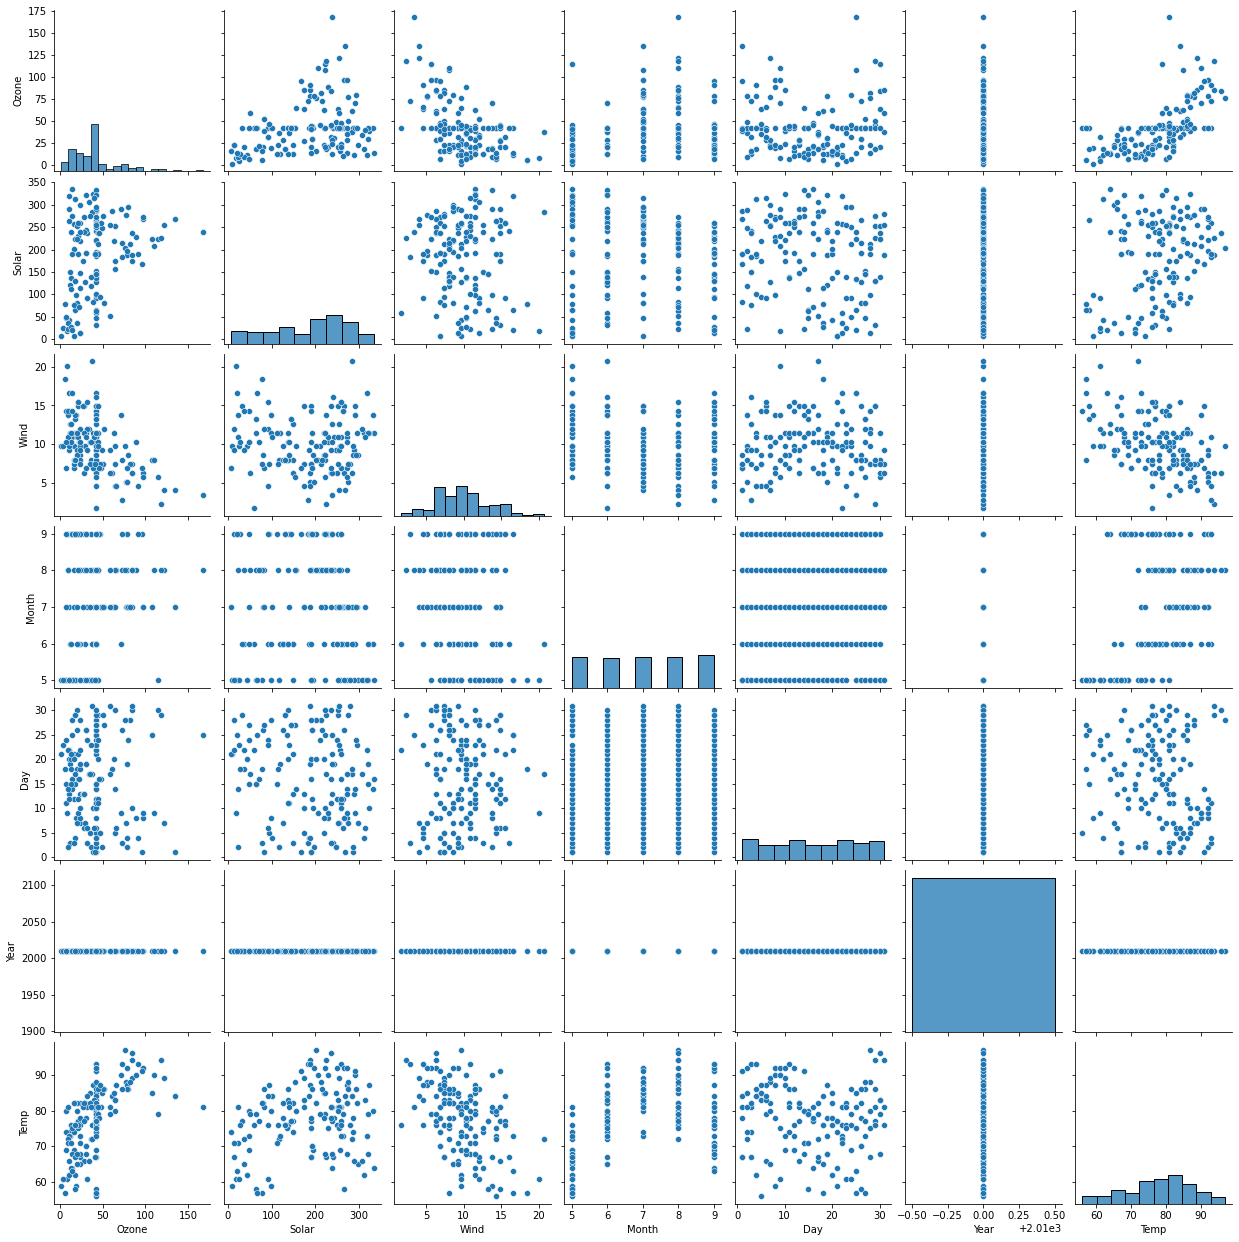

In [47]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data_cleaned3)

In [48]:
#Correlation
data_cleaned3.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.308687,-0.520004,0.132860,-0.021916,NaN,0.606500
Solar,0.308687,1.000000,-0.057407,-0.094012,-0.155663,NaN,0.273558
Wind,-0.520004,-0.057407,1.000000,-0.166216,0.029900,NaN,-0.441228
Month,0.132860,-0.094012,-0.166216,1.000000,0.050055,NaN,0.398516
Day,-0.021916,-0.155663,0.029900,0.050055,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.273558,-0.441228,0.398516,-0.122787,NaN,1.000000


# Transformations

#### Dummy Variable

In [49]:
data_cleaned4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Weather
1,41.000000,190.0,7.4,5.0,1,2010,67,S,S
2,36.000000,118.0,8.0,5.0,2,2010,72,C,C
3,12.000000,149.0,12.6,5.0,3,2010,74,PS,PS
4,18.000000,313.0,11.5,5.0,4,2010,62,S,S
5,41.815126,NaN,14.3,5.0,5,2010,56,S,S
...,...,...,...,...,...,...,...,...,...
153,20.000000,223.0,11.5,9.0,30,2010,68,S,S
154,41.000000,190.0,7.4,5.0,1,2010,67,C,C
155,30.000000,193.0,6.9,9.0,26,2010,70,PS,PS
156,41.815126,145.0,13.2,9.0,27,2010,77,S,S


In [50]:
#Creating dummy variable for Weather column
data_cleaned4=pd.get_dummies(data,columns=['Weather'])

In [51]:
data_cleaned4

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
1,41.0,190.0,7.4,67.0,5.0,1,2010,67,0,0,1
2,36.0,118.0,8.0,72.0,5.0,2,2010,72,1,0,0
3,12.0,149.0,12.6,74.0,5.0,3,2010,74,0,1,0
4,18.0,313.0,11.5,62.0,5.0,4,2010,62,0,0,1
5,NaN,NaN,14.3,56.0,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67.0,5.0,1,2010,67,1,0,0
155,30.0,193.0,6.9,70.0,9.0,26,2010,70,0,1,0
156,NaN,145.0,13.2,77.0,9.0,27,2010,77,0,0,1
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,0,0,1


In [52]:
data_cleaned4=data_cleaned4.dropna()

#### Normalization of the data

In [53]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [54]:
data_cleaned4.values

array([[ 41. , 190. ,   7.4, ...,   0. ,   0. ,   1. ],
       [ 36. , 118. ,   8. , ...,   1. ,   0. ,   0. ],
       [ 12. , 149. ,  12.6, ...,   0. ,   1. ,   0. ],
       ...,
       [ 30. , 193. ,   6.9, ...,   0. ,   1. ,   0. ],
       [ 14. , 191. ,  14.3, ...,   0. ,   0. ,   1. ],
       [ 18. , 131. ,   8. , ...,   1. ,   0. ,   0. ]])

In [55]:
array = data_cleaned4.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[0.24 0.56 0.28 0.25 0.   0.   0.   0.25 0.   0.   1.  ]
 [0.21 0.34 0.31 0.38 0.   0.03 0.   0.38 1.   0.   0.  ]
 [0.07 0.43 0.56 0.43 0.   0.07 0.   0.43 0.   1.   0.  ]
 [0.1  0.94 0.5  0.12 0.   0.1  0.   0.12 0.   0.   1.  ]
 [0.13 0.89 0.34 0.2  0.   0.2  0.   0.2  0.   1.   0.  ]]


In [56]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [57]:
array = data_cleaned4.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-0.02  0.05 -0.71 -1.15 -1.53 -1.7   0.   -1.15 -0.64 -0.68  1.28]
 [-0.17 -0.75 -0.54 -0.62 -1.53 -1.59  0.   -0.62  1.57 -0.68 -0.78]
 [-0.9  -0.41  0.77 -0.4  -1.53 -1.48  0.   -0.4  -0.64  1.47 -0.78]
 [-0.72  1.43  0.45 -1.69 -1.53 -1.36  0.   -1.69 -0.64 -0.68  1.28]
 [-0.57  1.27 -0.37 -1.37 -1.53 -1.02  0.   -1.37 -0.64  1.47 -0.78]]


# Speed up the EDA process

In [58]:
!pip install pandas-profiling==2.7.1
#!pip install sweetviz

In [59]:
import pandas_profiling as pp
import sweetviz as sv

In [60]:
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/geethikapanikker/opt/anaconda3/lib/python3.8/site-packages/pandas_profiling/visualisation/plot.py:166: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
sweet_report = sv.analyze(data)
sweet_report.show_html('weather_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
